In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("data/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#info
# print(df.shape)
# df.info()

# Check for missing values
null_columns = df.isnull().sum()
print(null_columns[null_columns > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


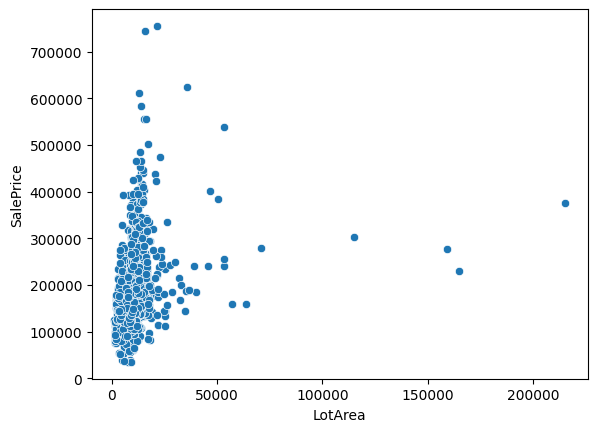

In [4]:
sns.scatterplot(data=df,x="LotArea",y="SalePrice")
plt.show()

In [5]:
# drop columns with null values
cols_to_drop = null_columns[null_columns > 500].index
df.drop(cols_to_drop,axis=1,inplace=True)

# Fill missing LotFrontage with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

df['MasVnrArea'].fillna(0, inplace=True)

# Fill Electrical with most common value
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

df.drop(['Id'], axis=1, inplace=True) 

# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10676\2196362144.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10676\2196362144.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

print(X.isnull().sum()[X.isnull().sum() > 0])
X['GarageYrBlt'].fillna(X['GarageYrBlt'].median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GarageYrBlt    81
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_10676\2402234825.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['GarageYrBlt'].fillna(X['GarageYrBlt'].median(), inplace=True)


Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2727475478.6945343
R² Score: 0.6444120621442568


Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 948144613.8429962
R² Score: 0.8616371732504481


Neural Network

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# train model
model = keras.models.Sequential([
    keras.layers.Dense(1024, activation="relu",input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       235,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 899,073 (3.43 MB)

 Trainable params: 895,489 (3.42 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [9]:
# train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 38602207232.0000 - mean_absolute_error: 181121.2031 - mean_squared_error: 38602207232.0000 - val_loss: 37785780224.0000 - val_mean_absolute_error: 180959.9531 - val_mean_squared_error: 37785780224.0000
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 38615502848.0000 - mean_absolute_error: 180346.3906 - mean_squared_error: 38615502848.0000 - val_loss: 37767475200.0000 - val_mean_absolute_error: 180907.9844 - val_mean_squared_error: 37767475200.0000
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 36835074048.0000 - mean_absolute_error: 176548.2031 - mean_squared_error: 36835074048.0000 - val_loss: 37737492480.0000 - val_mean_absolute_error: 180828.2812 - val_mean_squared_error: 37737492480.0000
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 37680848896.0000 - mean_absolute_error: 179076.5156 - mean_squared_error: 37680848896.0000 - val_loss: 37707268096.0000 - val_mean_absolute_error: 180746.0625

Neural Network 2

In [10]:
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# train model
model = keras.models.Sequential([
    keras.layers.Dense(1024, activation="relu",input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test).flatten()

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 41742749696.0000 - mean_absolute_error: 186230.2188 - mean_squared_error: 41742749696.0000 - val_loss: 34402021376.0000 - val_mean_absolute_error: 173138.2500 - val_mean_squared_error: 34402021376.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 41270112256.0000 - mean_absolute_error: 184620.3125 - mean_squared_error: 41270112256.0000 - val_loss: 34400927744.0000 - val_mean_absolute_error: 173138.6875 - val_mean_squared_error: 34400927744.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 40274726912.0000 - mean_absolute_error: 183590.9219 - mean_squared_error: 40274726912.0000 - val_loss: 34400837632.0000 - val_mean_absolute_error: 173141.2969 - val_mean_squared_error: 34400837632.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 39460749312.0000 - mean_absolute_error: 181627.3594 - mean_squared_error: 39460749312.0000 - val_loss: 34401968128.0000 - val_mean_absolute_error: 173148.0000 - val_m